In [1]:
import pandas as pd
import matplotlib.pyplot as plt

rna_sample_df = pd.read_csv('rna_sample_df.csv')
df = pd.read_csv('../../output_data/RNA.csv')
cols = list(rna_sample_df['Sample'].values)


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_72684/470988294.py:4: DtypeWarning: Columns (21,30,81,167,179,296,337,346,397,483,495,612) have mixed types. Specify dtype option on import or set low_memory=False.
  rna_sample_df = pd.read_csv('rna_sample_df.csv')


C3N.02333_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_4637d3ef.87c2.4e41.92e2.091f402acd2e
C3N.03889_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_f590b1ab.51c7.4ed1.9405.9ae12576375d
C3L.04849_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_7e7d40a3.1f3d.474c.b94f.f76e6d9d3629
C3N.03620_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_735bdf01.2bd0.4cb4.ada9.808641322a5c
C3L.00977_Normal_RNA_HeadandNeckSquamousCellCarcinoma_0bbf7428.7832.4f18.9503.7812adf8cea6
C3N.03028_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_68fab582.d4c0.4dc8.8c38.ce7fd79dcbcb
C3L.01138_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_f2b55581.fc93.4962.ab74.032e23cc7286
C3N.02727_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_7c8e53fa.506e.46f1.b5ee.a2a31c3cb747
C3N.03488_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_e9f6181a.c330.480e.ad23.99ae5316b230
C3L.00995_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_517599b4.5ada.4763.a59f.f222caa50fed
C3N.00729_Tumor_RNA_UterineCorpusEndometrialCarcinoma_99666f11.9088.4b77.a710.720892115a22
C3N.0304

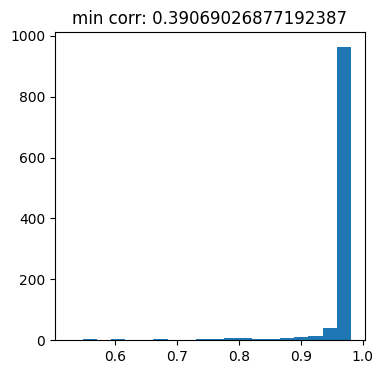

In [24]:
import numpy as np
mean_rna = np.nanmean(df[cols].values, axis=1)
df = df[mean_rna > 10]

corr = df[cols].corr()
# Print out the minimum correlation:
mean_cor = np.nanmean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])
# Plot out the mean correlation values so we can choose a good filter.
plt.hist(mean_cor, bins=20)
plt.title(f'min corr: {np.min(corr)}')

# Filter the shitty patients
corr_sorted = corr.sort_values(by=['mean_corr'])
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < 0.7]
#u.dp([len(corr_sorted), 'patients with avg. correlations less than 50%. Filtering out these samples, and printing cases.'])

cols_to_omit = [c for c in corr_sorted.index]
print('\n'.join(cols_to_omit))
cols_to_keep = [c for c in df.columns if c not in cols_to_omit]
df = df[cols_to_keep]

# Drop CpGs with > 50% missing values
df = df[df.isnull().sum(axis=1) < len(df.values[0])/2]

# Filter sample df to only include those samples
sample_df = rna_sample_df[rna_sample_df['Sample'].isin(cols_to_keep)]

In [25]:
print(np.mean(np.mean(corr) - 2*np.std(corr)))

0.8403930866132304


# Now we want to check each cancer has a separation between tumour and normal and all cancers also have a decent separation

In [26]:

cols = list(sample_df['Sample'].values)
vals = df[cols].values.T
# If there is a missing CpG replace it with the mean value for that CpG


In [27]:
sample_df

,SafeCases,Sample,TumorStage_x,Stage_x,AgeYears_x,CaseFiles_x,CaseFileCounts_x,Case ID_x,Cases Submitter ID_x,Related Entities_x,...,treatment_dose_y,treatment_dose_units_y,treatment_effect_y,treatment_effect_indicator_y,treatment_frequency_y,treatment_intent_type_y,treatment_or_therapy_y,treatment_outcome_y,treatment_type_y,Disease
0,C3N.01946,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,Stage II,Early,-64.0,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ed85e-8f98-11ea-b1fd-0aad30af8a83,C3N-01946,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
1,C3N.01946,C3N.01946_Tumor_RNA_HeadandNeckSquamousCellCar...,Stage II,Early,-64.0,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ed85e-8f98-11ea-b1fd-0aad30af8a83,C3N-01946,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
2,C3N.01754,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,Stage III,Late,-64.0,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ecd30-8f98-11ea-b1fd-0aad30af8a83,C3N-01754,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
3,C3N.01754,C3N.01754_Tumor_RNA_HeadandNeckSquamousCellCar...,Stage III,Late,-64.0,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ecd30-8f98-11ea-b1fd-0aad30af8a83,C3N-01754,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
5,C3L.01138,C3L.01138_Normal_RNA_HeadandNeckSquamousCellCa...,Stage IV,Late,-62.0,C3L.01138_Tumor_RNA_HeadandNeckSquamousCellCar...,5,df4e9d3d-8f98-11ea-b1fd-0aad30af8a83,C3L-01138,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,C3N.02582,C3N.02582_Normal_RNA_LungAdenocarcinoma_affd75...,Stage II,Early,-77.0,C3N.02582_Normal_RNA_LungAdenocarcinoma_affd75...,2,f1ee4435-cf1e-11e9-9a07-0a80fada099c,C3N-02582,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1091,C3N.02586,C3N.02586_Normal_RNA_LungAdenocarcinoma_eeea13...,Stage II,Early,-74.0,C3N.02586_Normal_RNA_LungAdenocarcinoma_eeea13...,2,f1ee455a-cf1e-11e9-9a07-0a80fada099c,C3N-02586,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1092,C3N.02587,C3N.02587_Normal_RNA_LungAdenocarcinoma_8b59c6...,Stage I,Early,-59.0,C3N.02587_Normal_RNA_LungAdenocarcinoma_8b59c6...,2,f1ee4684-cf1e-11e9-9a07-0a80fada099c,C3N-02587,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1093,C3N.02588,C3N.02588_Normal_RNA_LungAdenocarcinoma_b835c7...,Stage II,Early,-69.0,C3N.02588_Normal_RNA_LungAdenocarcinoma_b835c7...,2,f1ee47a8-cf1e-11e9-9a07-0a80fada099c,C3N-02588,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma


In [28]:
import pandas as pd
from sciviso import *
from sciutil import SciUtil
import seaborn as sns
# Have a look at clustering each of these
from sklearn.decomposition import PCA
vals = np.log2(vals + 1)
pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage_x'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values


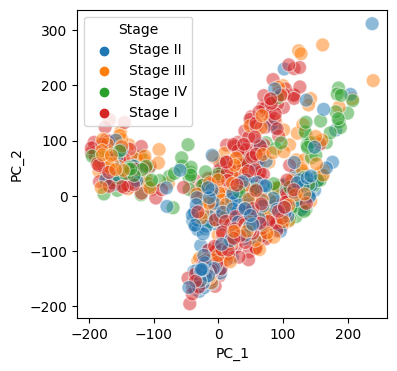

In [29]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Stage', s=100, alpha=0.5)
plt.show()

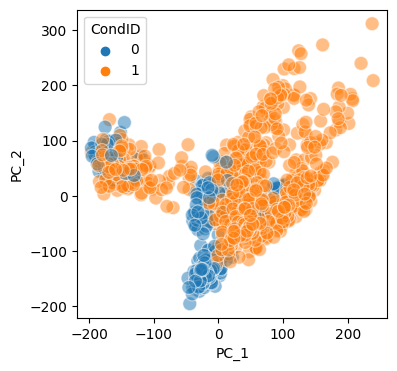

In [30]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='CondID', s=100, alpha=0.5)
plt.show()

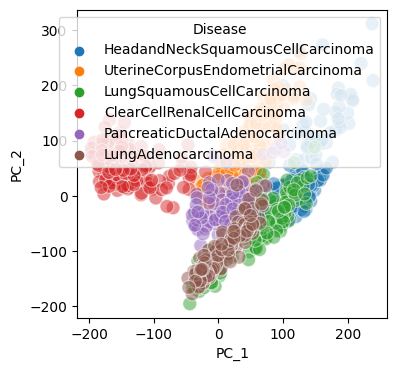

In [31]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Disease', s=100, alpha=0.5)
plt.show()